<a href="https://colab.research.google.com/github/khoa030602/Food/blob/main/food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#tải tập dữ liệu hình ảnh, chuyển đổi chúng thành mảng NumPy,
#và lưu các mảng này vào đĩa để sử dụng trong quá trình đào tạo hoặc kiểm tra mô hình.
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array


In [ ]:
# kết nối với Google Drive trong môi trường Colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)

training_set=train_data.flow_from_directory('/content/drive/MyDrive/AI/Data/Monantruyenthong/Train',target_size=(300,300), batch_size=32, class_mode='categorical')
test_set=test_data.flow_from_directory('/content/drive/MyDrive/AI/Data/Monantruyenthong/Validation',target_size=(300,300 ), batch_size=32, class_mode='categorical')
     


training_set.class_indices
test_set.class_indices


Found 10 images belonging to 10 classes.
Found 80 images belonging to 10 classes.


{'Banh_bo': 0,
 'Banh_bot_loc': 1,
 'Banh_cuon': 2,
 'Banh_da_lon': 3,
 'Banh_mi': 4,
 'Banh_tet': 5,
 'Banh_trung_thu': 6,
 'Banh_xeo': 7,
 'Com_tam': 8,
 'Pho': 9}

In [ ]:
#tạo mô hình CNN sủ dụng tuần tự
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         #dense :full conected ANN
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(300,300,3),padding = 'same'))                                                          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))




#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(256,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(10,activation = 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 300, 300, 32)      896       
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 300, 300, 32)      0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 150, 150, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 150, 150, 64)      18496     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 150, 150, 64)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 75, 75, 64)       0         
 2D)                                                  

In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs= 10 , batch_size= 512 ,verbose= 1)
test_loss,test_acc = model.evaluate(training_set)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 0.4065 - accuracy: 1.0000
Epoch 2/10
1/1 [==============================] - 0s 276ms/step - loss: 4.9331 - accuracy: 0.8000
Epoch 3/10
1/1 [==============================] - 0s 251ms/step - loss: 1.0769 - accuracy: 0.8000
Epoch 4/10
1/1 [==============================] - 0s 270ms/step - loss: 0.4840 - accuracy: 0.9000
Epoch 5/10
1/1 [==============================] - 0s 266ms/step - loss: 0.3968 - accuracy: 0.9000
Epoch 6/10
1/1 [==============================] - 0s 265ms/step - loss: 0.2156 - accuracy: 0.9000
Epoch 7/10
1/1 [==============================] - 0s 273ms/step - loss: 0.3149 - accuracy: 0.8000
Epoch 8/10
1/1 [==============================] - 0s 274ms/step - loss: 0.1112 - accuracy: 0.9000
Epoch 9/10
1/1 [==============================] - 0s 258ms/step - loss: 0.0774 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 384ms/step - loss: 0.0327 - accuracy: 1.0000
độ chính xác trên tập 

In [ ]:
#Lưu
from keras.models import load_model
model.save("food.h5")
model_1=load_model('food.h5')


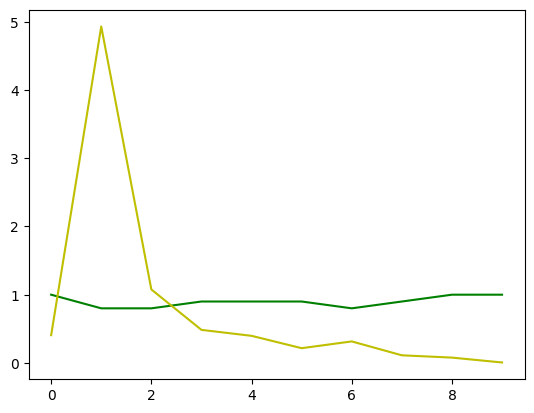

In [ ]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    # VẼ ĐỒ THỊ SỬ MẤT MÁT VÀ ĐỘ HỌC TẬP CHÍNH XÁC CỦA BÀI KIỂM TRA
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()

1/1 [==============================] - 0s 67ms/step
Pho


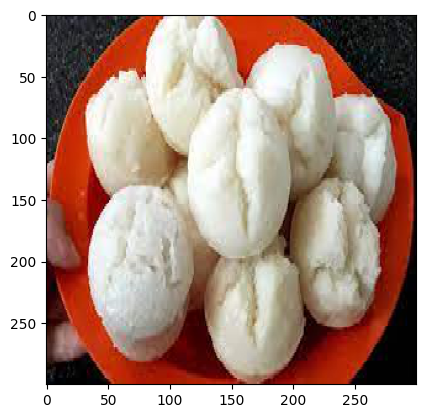

1/1 [==============================] - 0s 21ms/step
Pho


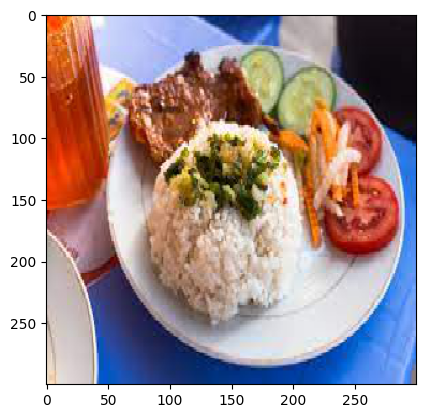

1/1 [==============================] - 0s 72ms/step
Pho


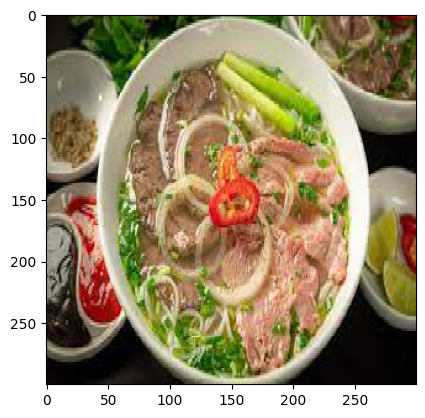

1/1 [==============================] - 0s 27ms/step
Pho


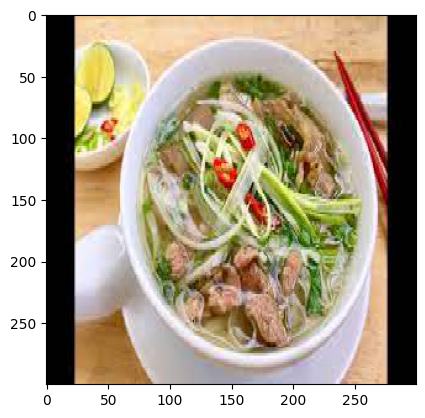

1/1 [==============================] - 0s 22ms/step
Pho


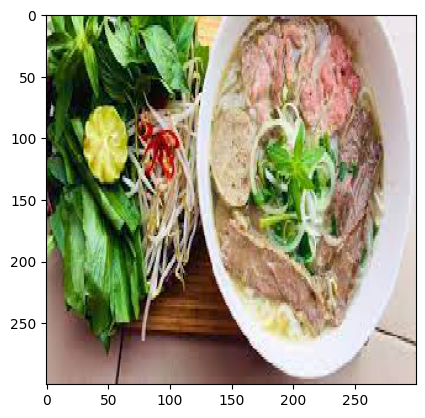

1/1 [==============================] - 0s 21ms/step
Pho


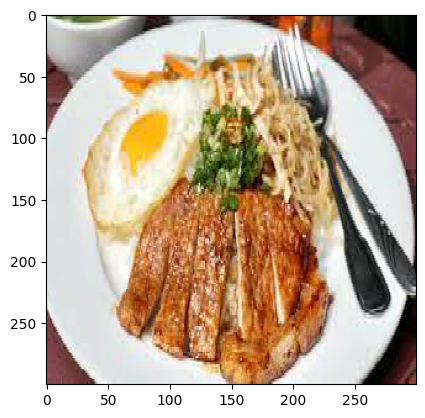

1/1 [==============================] - 0s 19ms/step
Pho


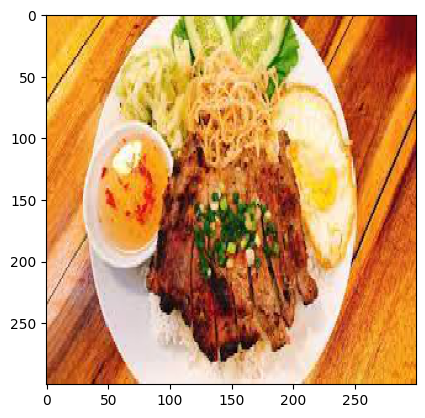

1/1 [==============================] - 0s 21ms/step
Com_tam


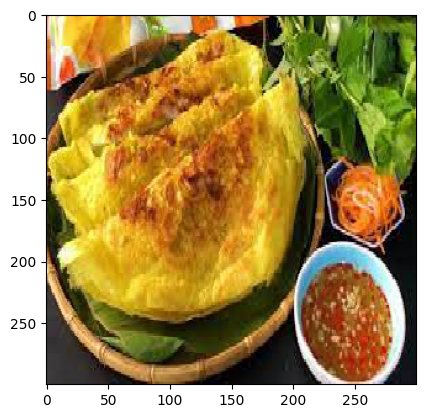

1/1 [==============================] - 0s 21ms/step
Com_tam


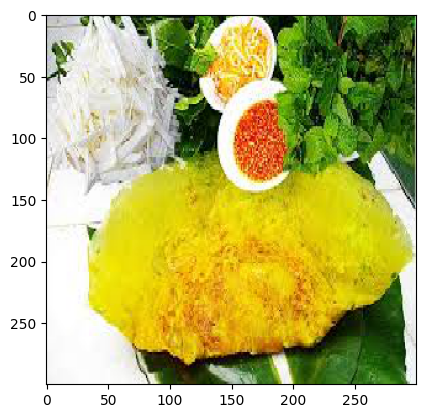

1/1 [==============================] - 0s 30ms/step
Pho


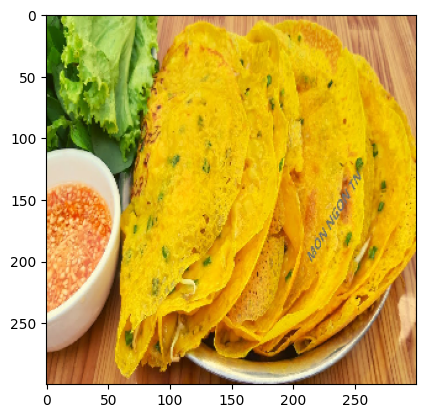

1/1 [==============================] - 0s 44ms/step
Com_tam


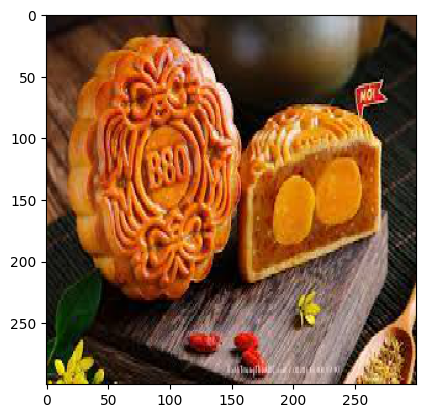

1/1 [==============================] - 0s 26ms/step
Com_tam


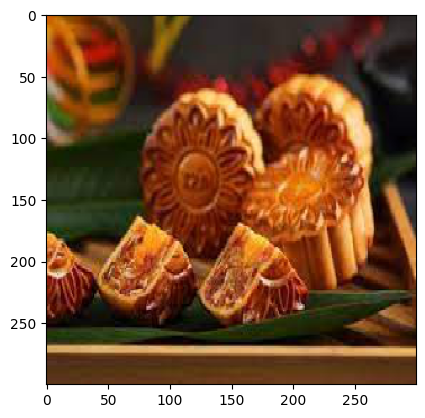

1/1 [==============================] - 0s 21ms/step
Pho


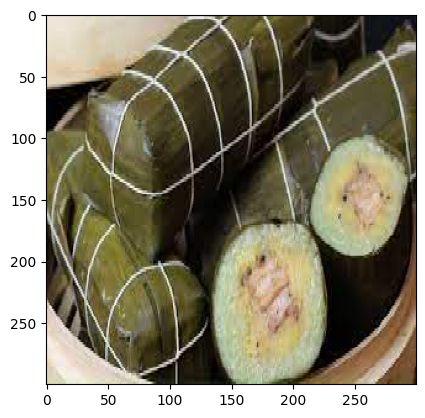

1/1 [==============================] - 0s 37ms/step
Com_tam


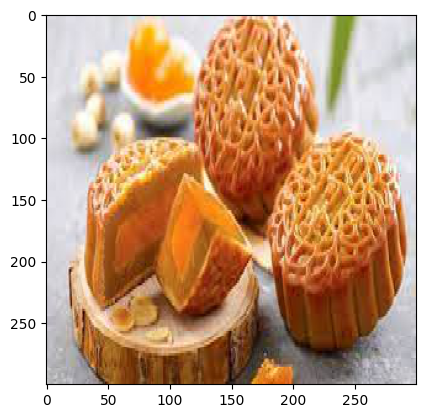

1/1 [==============================] - 0s 26ms/step
Pho


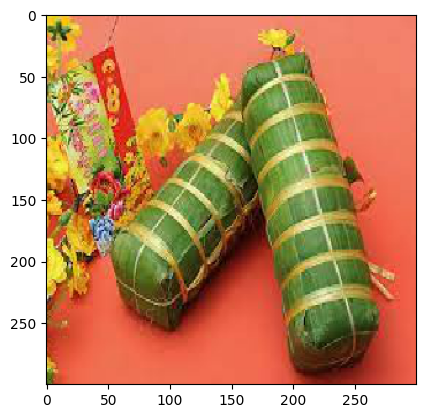

1/1 [==============================] - 0s 28ms/step
Pho


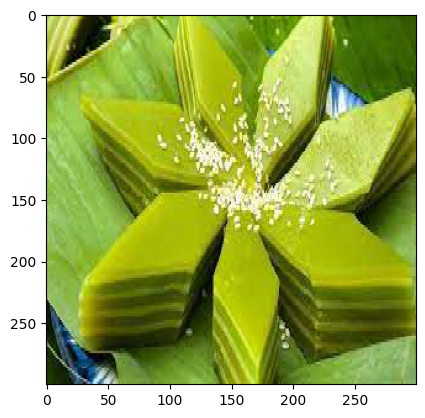

1/1 [==============================] - 0s 33ms/step
Com_tam


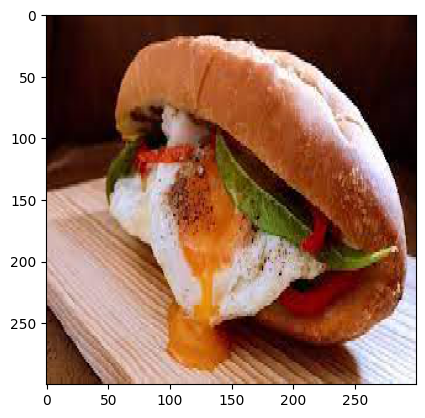

1/1 [==============================] - 0s 27ms/step
Com_tam


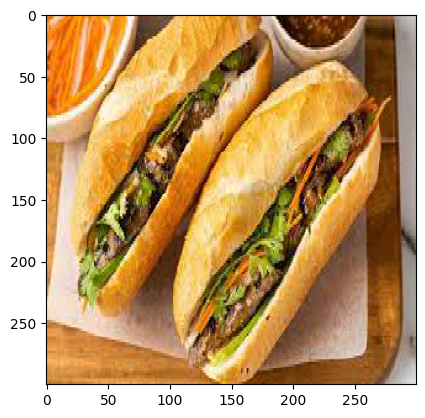

1/1 [==============================] - 0s 32ms/step
Pho


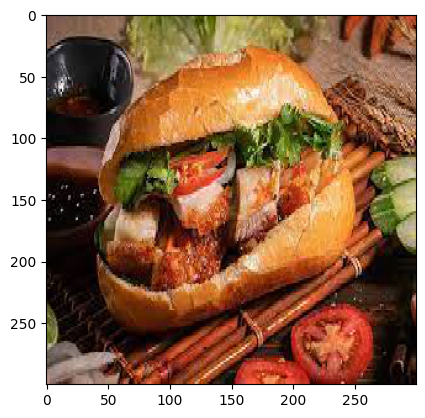

1/1 [==============================] - 0s 28ms/step
Pho


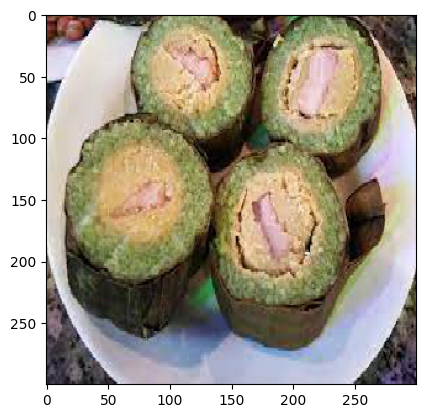

1/1 [==============================] - 0s 27ms/step
Pho


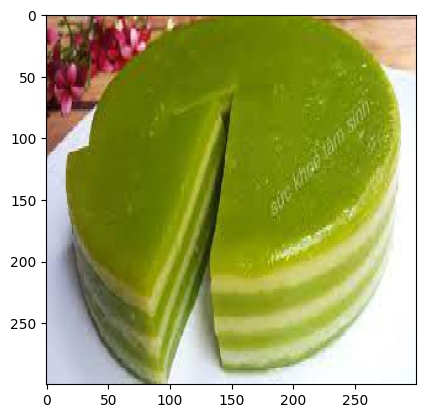

1/1 [==============================] - 0s 30ms/step
Pho


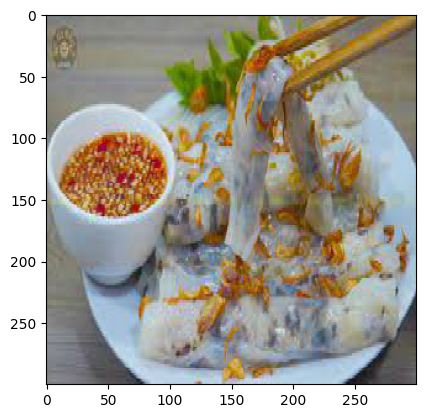

1/1 [==============================] - 0s 42ms/step
Pho


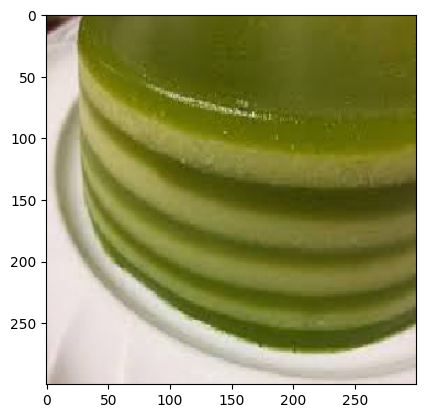

1/1 [==============================] - 0s 50ms/step
Com_tam


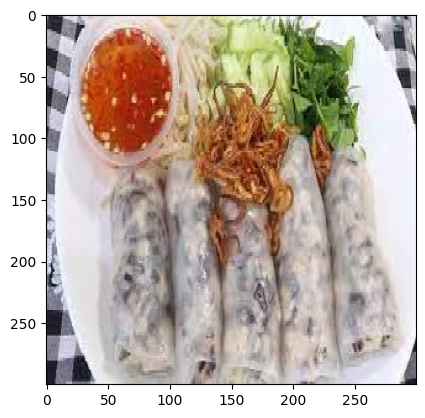

1/1 [==============================] - 0s 51ms/step
Pho


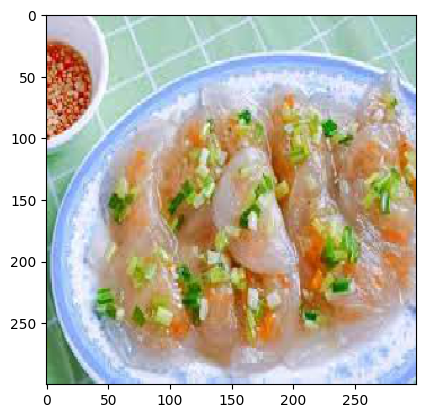

1/1 [==============================] - 0s 52ms/step
Pho


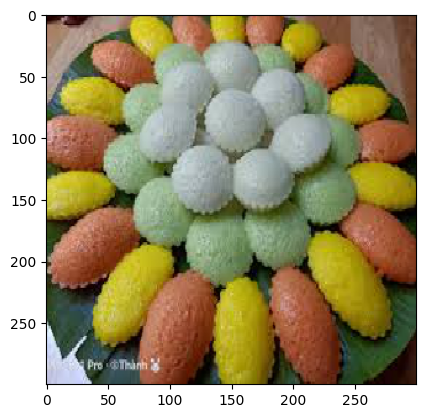

1/1 [==============================] - 0s 29ms/step
Pho


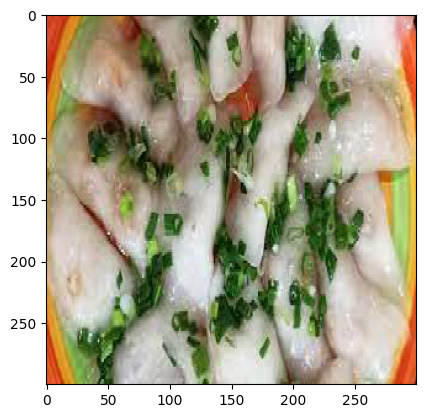

1/1 [==============================] - 0s 57ms/step
Pho


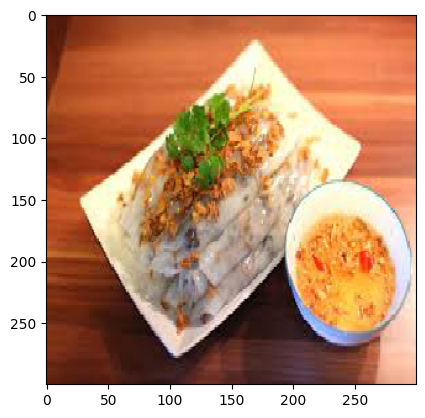

1/1 [==============================] - 0s 46ms/step
Pho


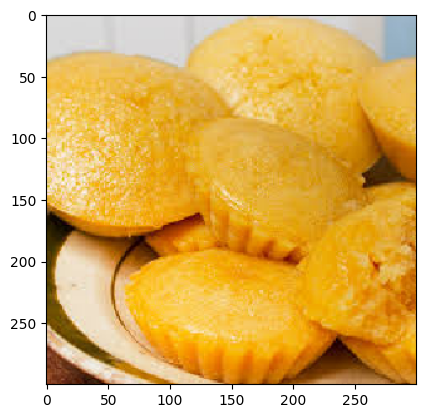

1/1 [==============================] - 0s 37ms/step
Pho


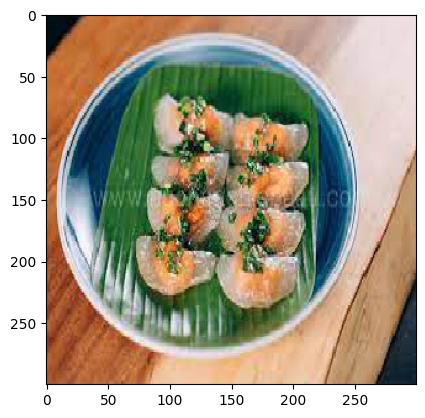

In [ ]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
test='/content/drive/MyDrive/AI/Data/Monantruyenthong/Test'
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(300,300))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['Banh cuon','Banh mi','Banh bo','Bánh tet','Bánh xèo', 'Pho','Banh da bo','Com tam','Banh trung thu','Banh bot loc']
  print(class_name[result]) 
  plt.show()